In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import load_processed_data as ld
from collections import defaultdict
from decimal import Decimal
from definitions import MODELS_PATH
from sklearn import metrics
from keras.models import load_model

# Load Models

In [164]:
# dict of model file pathnames
model_file_paths = defaultdict(str)

# model file pathnames
model_file_paths[1] = MODELS_PATH + 'model_myCNNbase_myNNclf.h5'
model_file_paths[2] = MODELS_PATH + 'model_FROZENvgg16base_myNNclf.h5'
model_file_paths[3] = MODELS_PATH + 'model_FINETUNINGvgg16base_myNNclf.h5'

# load models
models = {k: load_model(v) for k, v in model_file_paths.items()}

# get model 1
m = models[1]

# Make Predictions

In [3]:
# load test data
X, y_ohe, _ = ld.load_test_data()

# convert y_ohe to a single column of encoded class labels
# NOTE: this implementation assumes y_ohe is correct without checking
y_true = np.argmax(y_ohe,
                   axis=1)

# get class labels
y_labels = ld.get_y_ohe_class_names()

# get class names in a format that is presentable
y_class_titles = [s.replace('_',' ').title() for s in y_labels]

# get model predictions
y_pred = m.predict_classes(X/255.)
y_pred_proba = m.predict_proba(X/255.)

# Confusion Matrix

In [4]:
# confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

In [35]:
# dataframe with the confusion matrix
df_cm = pd.DataFrame(data=cm,
                     index=y_class_titles,
                     columns=y_class_titles)

# set index name and column name
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'

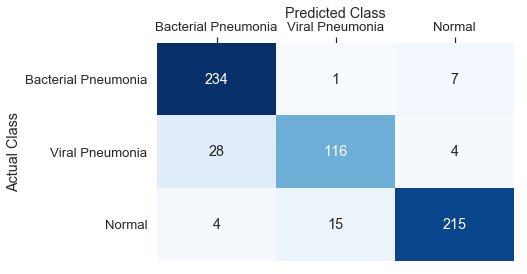

In [165]:
# create a figure
fig = plt.figure(figsize=(6.4, 4))

# get the figure's axis
ax = fig.gca()

# set seaborn font scale
sns.set(font_scale=1.2)

# plot heatmap
ax = sns.heatmap(df_cm,
                 annot=True,
                 fmt=".0f",
                 cbar=False,
                 cmap='Blues')

# move xaxis ticks and labels to top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Classification Report

In [147]:
# make a classification report
report = metrics.classification_report(y_true,
                                       y_pred,
                                       target_names=y_class_titles,
                                       output_dict=True)

# make a dataframe with the classification report
df_report = pd.DataFrame(report).transpose()

# rename the averages to be presentable
index_map = {'micro avg':'Micro Average',
            'macro avg': 'Macro Average',
            'weighted avg': 'Weighted Average'}
df_report.rename(index=index_map,
                 inplace=True)

Index(['Bacterial Pneumonia', 'Viral Pneumonia', 'Normal', 'micro avg',
       'macro avg', 'weighted avg'],
      dtype='object')

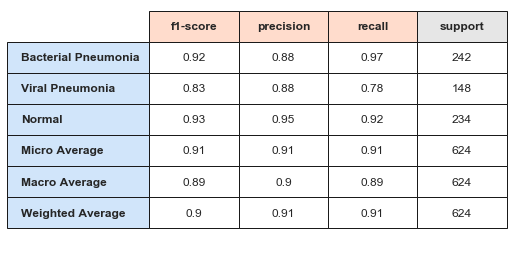

In [149]:
# create a figure
fig = plt.figure(figsize=(6.4, 4))

# get the figure's axis
ax = fig.gca()

# do not display the axis
ax.axis('off')

# create a table from the pivot table
t = ax.table(cellText=df_report.values,
             cellLoc='center',
             rowLabels=df_report.index,
             colLabels=df_report.columns,
             loc='right',
             bbox=[0, 0, 1, 1])

# format the cells
for x in range(3):
    t[0, x].set_facecolor('#ffdccc')  # light orange
    t[0, x].set_text_props(fontweight='bold')

t[0, 3].set_facecolor('#e6e6e6')  # light grey
t[0, 3].set_text_props(fontweight='bold')

for y in np.arange(1, 7):
    t[y, -1].set_facecolor('#d1e5fa')  # light blue
    t[y, -1].set_text_props(fontweight='bold')


# set number of digits to display
for y in range(1, 7):
    t[y, 3].get_text().set_text(t[y, 3].get_text().get_text().split('.')[0])
    for x in range(3):
        t[y, x].get_text().set_text(str(round(float(t[y, x].get_text().get_text()),2)))
        
# set the font size
t.auto_set_font_size(False)
t.set_fontsize(12)

# save the figure
#fig.savefig('test.png',
#            bbox_inches='tight')